# E-commerce Machine Learning


In [149]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Spark Session Initiate

In [150]:
spark = SparkSession.builder.master('local[6]')\
                            .appName('ecommerce')\
                            .getOrCreate()
spark

In [151]:
# spark.stop()

## Load Dataset
Source : [Pakistan E-commerce Dataset](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset/data)

In [152]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

In [153]:
# define dataframe schema
schema = StructType([
    StructField('item_id', IntegerType(), True),
    StructField('status', StringType(), True),
    StructField('created_at', StringType(), True),
    StructField('sku', StringType(), True),
    StructField('price', FloatType(), True),
    StructField('qty_ordered', IntegerType(), True),
    StructField('grand_total', FloatType(), True),
    StructField('increment_id', IntegerType(), True),
    StructField('category_name_1', StringType(), True),
    StructField('sales_commission_code', StringType(), True),
    StructField('discount_amount', FloatType(), True),
    StructField('payment_method', StringType(), True),
    StructField('working_date', StringType(), True),
    StructField('BI Status', StringType(), True),
    StructField(' MV', StringType(), True),
    StructField('Year', StringType(), True),
    StructField('Month', StringType(), True),
    StructField('Customer Since', StringType(), True),
    StructField('M-Y', StringType(), True),
    StructField('F-Y', StringType(), True),
    StructField('Customer ID', StringType(), True),
    # ignore last 5 column data because it's empty column
])

In [154]:
# tmp = pd.read_csv('./dataset/Pakistan Largest Ecommerce Dataset.csv')
# tmp.info()

In [155]:
df = spark.read.csv('./dataset/Pakistan Largest Ecommerce Dataset.csv', header=True, schema=schema)
df.printSchema()
df.show(5)

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- sku: string (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- increment_id: integer (nullable = true)
 |-- category_name_1: string (nullable = true)
 |-- sales_commission_code: string (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- working_date: string (nullable = true)
 |-- BI Status: string (nullable = true)
 |--  MV: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Customer Since: string (nullable = true)
 |-- M-Y: string (nullable = true)
 |-- F-Y: string (nullable = true)
 |-- Customer ID: string (nullable = true)

+-------+--------------+----------+--------------------+------+-----------+-----------+------------+-----------------+----------

In [156]:
df.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,584524.0,NaN,NaN,NaN,565667.074218,200121.173648,211131.0,395000.75,568424.5,739106.25,905208.0
status,584520,19,complete,233685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,584535,790,11/25/2016,15169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku,584515,84897,MATSAM59DB75ADB2F80,3775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,584524.0,NaN,NaN,NaN,8236.0625,435291.6875,0.0,360.0,899.0,4070.0,100348152.0
qty_ordered,584513.0,NaN,NaN,NaN,1.296394,3.996098,1.0,1.0,1.0,1.0,1000.0
grand_total,584513.0,NaN,NaN,NaN,8530.706055,61321.390625,-1594.0,945.0,1960.199951,6999.0,17888000.0
increment_id,584512.0,NaN,NaN,NaN,100355601.703919,388757.583304,0.0,100264561.75,100351163.5,100450243.25,100562387.0
category_name_1,584360,18,Mobiles & Tablets,115710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales_commission_code,447353,7236,\N,338990,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
print('shape of df:', (df.count(), len(df.columns)))

shape of df: (1048586, 21)


In [158]:
# df.toPandas().info()

## Preprocessing Data

In [159]:
import pyspark.sql.functions as F

### Drop Unused Columns

In [160]:
df = df.drop('working_date','sales_commission_code',' MV','F-Y','M-Y','Year','Month','increment_id','sku')
print('shape of df:', (df.count(), len(df.columns)))

shape of df: (1048586, 12)


### Rename Columns

In [161]:
df = df.withColumnsRenamed({'category_name_1':'category', 'BI Status':'bi_status', 'Customer ID':'customer_id', 'Customer Since': 'customer_since'})
df.columns

['item_id',
 'status',
 'created_at',
 'price',
 'qty_ordered',
 'grand_total',
 'category',
 'discount_amount',
 'payment_method',
 'bi_status',
 'customer_since',
 'customer_id']

### Handle Null Value 

In [162]:
for c in df.columns: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in item_id 464062
NULL in status 464066
NULL in created_at 464051
NULL in price 464062
NULL in qty_ordered 464073
NULL in grand_total 464073
NULL in category 464226
NULL in discount_amount 464073
NULL in payment_method 464062
NULL in bi_status 464062
NULL in customer_since 464062
NULL in customer_id 464073


In [163]:
df.filter('customer_id IS NULL').show(10)

+-------+--------+----------+------------+-----------+-----------+--------+---------------+--------------+---------+--------------+-----------+
|item_id|  status|created_at|       price|qty_ordered|grand_total|category|discount_amount|payment_method|bi_status|customer_since|customer_id|
+-------+--------+----------+------------+-----------+-----------+--------+---------------+--------------+---------+--------------+-----------+
| 217788|complete| 7/24/2016|        NULL|       NULL|       NULL|    NULL|           NULL|          NULL|     NULL|          NULL|       NULL|
|   NULL|    2660|         1|1.00152216E8|       NULL|       NULL|     cod|           NULL|        2,660 |        7|          1806|       NULL|
| 424131|complete| 3/18/2017|        NULL|       NULL|       NULL|    NULL|           NULL|          NULL|     NULL|          NULL|       NULL|
|   NULL|     999|         1| 1.0028058E8|       NULL|       NULL|     cod|           NULL|          999 |        3|         31987|     

a lot of rows are empty, we can see that mostly it's because there is no valid customer data (i.e customer_id and transaction status). So we will drop these invalid rows.

In [164]:
df = df.na.drop(subset=['customer_id','status'])

In [165]:
df.count()

584498

In [166]:
# re-check remaining missing value in columns
for c in df.columns: print(f'NULL in {c}',df.filter(f'{c} IS NULL').count()) 

NULL in item_id 0
NULL in status 0
NULL in created_at 0
NULL in price 0
NULL in qty_ordered 0
NULL in grand_total 0
NULL in category 164
NULL in discount_amount 0
NULL in payment_method 0
NULL in bi_status 0
NULL in customer_since 0
NULL in customer_id 0


In [167]:
# handle null sku data
tmp = df.filter('sku IS NULL').select('item_id').collect()
tmp = [int(row['item_id']) for row in tmp]

In [168]:
tmp1 = df.filter(df.item_id.isin(tmp))
tmp1.groupBy('item_id').count().orderBy('count', ascending=False).show(30)

+-------+-----+
|item_id|count|
+-------+-----+
| 230008|    1|
| 236830|    1|
| 260007|    1|
| 260006|    1|
| 260061|    1|
| 367292|    1|
| 429392|    1|
| 399798|    1|
| 429421|    1|
| 426105|    1|
| 429393|    1|
| 368362|    1|
| 432276|    1|
| 426302|    1|
| 368122|    1|
| 605954|    1|
| 506324|    1|
| 595858|    1|
| 605740|    1|
| 605726|    1|
+-------+-----+



In [169]:
# handle null category data
tmp = df.filter('category IS NULL').select('item_id').collect()
tmp = [int(row['item_id']) for row in tmp]

In [170]:
tmp1 = df.filter(df.item_id.isin(tmp))
tmp1.groupBy('item_id').count().orderBy('count', ascending=False).show(30)

+-------+-----+
|item_id|count|
+-------+-----+
| 757685|    1|
| 731122|    1|
| 732569|    1|
| 733363|    1|
| 733727|    1|
| 737199|    1|
| 744922|    1|
| 725194|    1|
| 737219|    1|
| 732578|    1|
| 733736|    1|
| 744351|    1|
| 757605|    1|
| 732575|    1|
| 732572|    1|
| 733367|    1|
| 733741|    1|
| 829983|    1|
| 830138|    1|
| 829959|    1|
| 830090|    1|
| 833708|    1|
| 829957|    1|
| 830102|    1|
| 768018|    1|
| 833704|    1|
| 830037|    1|
| 830009|    1|
| 830033|    1|
| 829961|    1|
+-------+-----+
only showing top 30 rows



because there is no other data with same item_id to category null dataframe. We can't fill the category value. So, for now we will drop all rows with invalid category 

In [171]:
print('before drop invalid category value :', df.count())
df = df.na.drop(subset=['category'])
print('after drop invalid category value :', df.count())

before drop invalid category value : 584498
after drop invalid category value : 584334


now we need to check non-null value in categorical data that refer to invalid value

### Enhance Data Quality

let's check categorical data's unique value to make sure the value is correct

In [172]:
df.select('status').distinct().show()
df.select('bi_status').distinct().show()
df.select('payment_method').distinct().show()
df.select('category').distinct().show()

+--------------+
|        status|
+--------------+
|      received|
|        holded|
|      canceled|
|        refund|
|      exchange|
|        closed|
|order_refunded|
|         fraud|
|      complete|
|          paid|
|pending_paypal|
|           cod|
|            \N|
|       pending|
|    processing|
|payment_review|
+--------------+

+---------+
|bi_status|
+---------+
|    #REF!|
|    Gross|
|      Net|
|    Valid|
+---------+

+-----------------+
|   payment_method|
+-----------------+
|              cod|
|  internetbanking|
|          mcblite|
| marketingexpense|
|       jazzwallet|
|        mygateway|
|   customercredit|
|          Payaxis|
|financesettlement|
|      jazzvoucher|
|    ublcreditcard|
|    productcredit|
|   cashatdoorstep|
|       Easypay_MA|
|  easypay_voucher|
|          Easypay|
|      bankalfalah|
|              apg|
+-----------------+

+------------------+
|          category|
+------------------+
|School & Education|
|       Kids & Baby|
|     Entertainm

### RECHECK>>DROP ONLY STATUS=='\N', cat and bi_status must fill

In [173]:
# remove '\N' from status and category column, remove '#REF!' from bi_status
print('before drop invalid category value :', df.count())
df = df.filter((df.status !='\\N') & (df.category !='\\N') & (df.bi_status != '#REF!'))
print('after drop invalid category value :', df.count())

before drop invalid category value : 584334
after drop invalid category value : 576483


In [174]:
df.groupBy('status').count().orderBy('count', ascending=False).show()

+--------------+------+
|        status| count|
+--------------+------+
|      complete|230451|
|      canceled|197974|
|      received| 77150|
|order_refunded| 58343|
|        refund|  7876|
|           cod|  2851|
|          paid|  1156|
|        closed|   492|
|payment_review|    57|
|       pending|    48|
|    processing|    33|
|        holded|    31|
|         fraud|    10|
|pending_paypal|     7|
|      exchange|     4|
+--------------+------+



we can see from status column unique values above that the category is too specific and unorganized.<br>
We can make it more general and simple by grouping the status into payment_status with 3 category, that is pass, pending, and fraud

In [175]:
# define status name will be under payment_status: pass
pass_stat = ['complete','canceled','received','order_refunded','refund','paid','closed','exchange']
# define status name will be under payment_status: pending
pend_stat = ['cod','payment_review','pending','processing','holded','pending_paypal']
# other that will be classified with payment_status: fraud

In [176]:
df = df.withColumn('payment_status', F.when(F.col('status').isin(pass_stat),'pass')\
                                    .when(F.col('status').isin(pend_stat),'pending')\
                                    .otherwise('fraud')
                    )

In [177]:
df.groupBy('status','payment_status').count().orderBy('count', ascending=False).show()

+--------------+--------------+------+
|        status|payment_status| count|
+--------------+--------------+------+
|      complete|          pass|230451|
|      canceled|          pass|197974|
|      received|          pass| 77150|
|order_refunded|          pass| 58343|
|        refund|          pass|  7876|
|           cod|       pending|  2851|
|          paid|          pass|  1156|
|        closed|          pass|   492|
|payment_review|       pending|    57|
|       pending|       pending|    48|
|    processing|       pending|    33|
|        holded|       pending|    31|
|         fraud|         fraud|    10|
|pending_paypal|       pending|     7|
|      exchange|          pass|     4|
+--------------+--------------+------+



### Drop Duplicate Data

In [178]:
print('before drop invalid category value :', df.count())
df = df.drop_duplicates()
print('after drop invalid category value :', df.count())

before drop invalid category value : 576483
after drop invalid category value : 576483


### Data Type Check

In [179]:
df = df.withColumn('created_at', F.to_date(F.unix_timestamp('created_at', 'M/d/y').cast('timestamp')))
df = df.withColumn('customer_since', F.to_date(F.unix_timestamp('customer_since', 'y-M').cast('timestamp')))

In [180]:
df.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: date (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- category: string (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- bi_status: string (nullable = true)
 |-- customer_since: date (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- payment_status: string (nullable = false)



## EDA

### Summary of Dataset

In [181]:
df.toPandas().describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_id,576483.0,NaN,NaN,NaN,568863.306573,199132.941748,211133.0,400808.0,572637.0,741165.5,905208.0
status,576483,15,complete,230451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,576483,789,2016-11-25,14929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,576483.0,NaN,NaN,NaN,6380.661133,15006.904297,0.0,360.0,900.0,4054.0,1012625.875
qty_ordered,576483.0,NaN,NaN,NaN,1.295216,3.997737,1.0,1.0,1.0,1.0,1000.0
grand_total,576483.0,NaN,NaN,NaN,8586.782227,61731.695312,-1594.0,952.100006,1986.455444,6998.399902,17888000.0
category,576483,15,Mobiles & Tablets,115709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_amount,576483.0,NaN,NaN,NaN,503.298645,1510.668579,-599.5,0.0,0.0,164.949997,90300.0
payment_method,576483,18,cod,267762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bi_status,576483,3,Net,230943,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
print('dataset shape :', (df.count(), len(df.columns)))

dataset shape : (576483, 13)


### Data Distribution

In [183]:
df.printSchema()

root
 |-- item_id: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- created_at: date (nullable = true)
 |-- price: float (nullable = true)
 |-- qty_ordered: integer (nullable = true)
 |-- grand_total: float (nullable = true)
 |-- category: string (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- bi_status: string (nullable = true)
 |-- customer_since: date (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- payment_status: string (nullable = false)



#### Numerical Data Distribution

In [184]:
tmp = df.select('qty_ordered','price','discount_amount','grand_total').toPandas()

In [185]:
# tmp[['qty_ordered','price','grand_total']] = np.log(tmp[['qty_ordered','price','grand_total']])
tmp = np.log(tmp)
tmp

c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,qty_ordered,price,discount_amount,grand_total
0,0.0,5.480639,-inf,5.480639
1,0.0,6.829794,-inf,6.829794
2,0.0,5.700444,-inf,5.700444
3,0.0,5.857933,-inf,5.857933
4,0.0,6.152733,-inf,9.132379
...,...,...,...,...
576478,0.0,6.475433,-inf,7.590347
576479,0.0,7.243513,-inf,8.022241
576480,0.0,4.043051,-inf,8.622454
576481,0.0,5.780744,-inf,6.689599


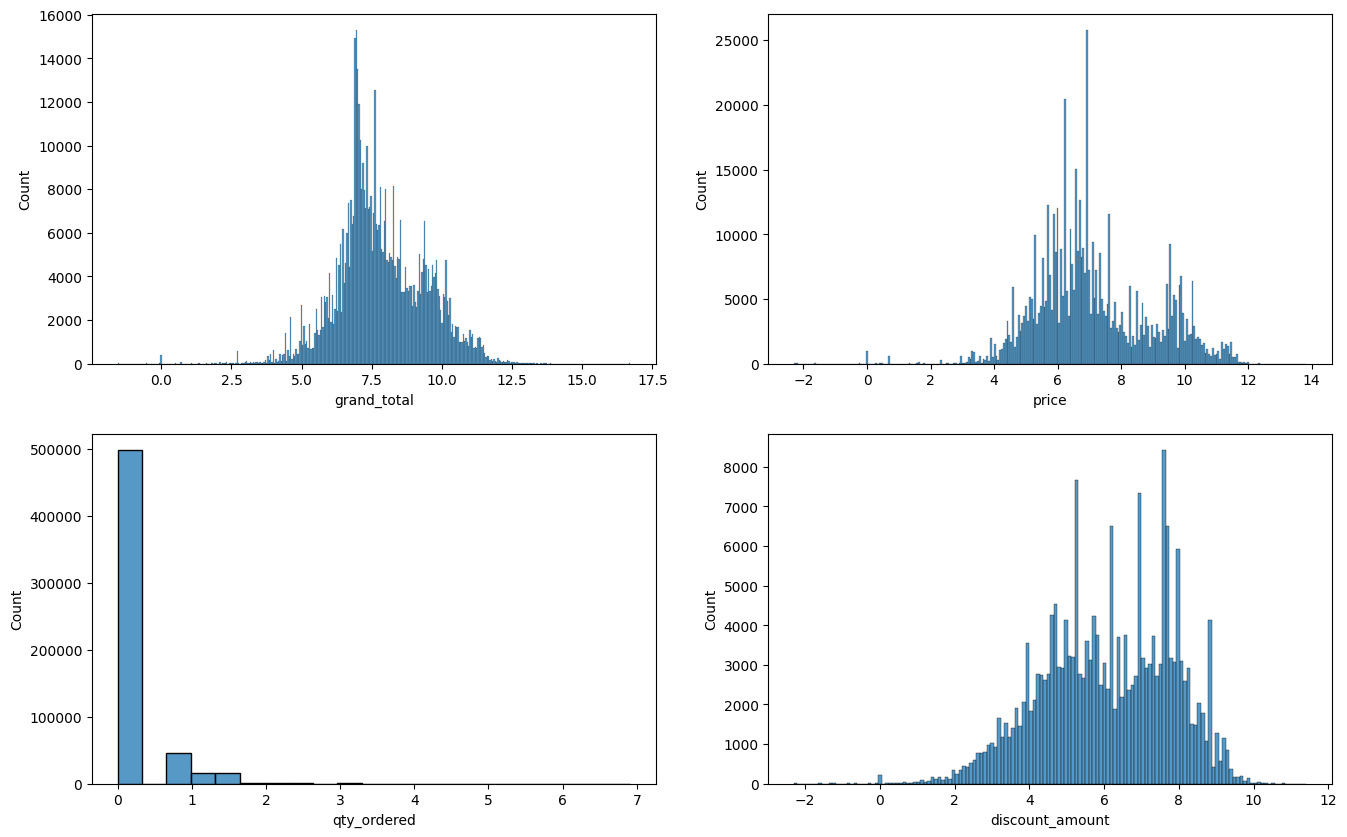

In [186]:
f, ax = plt.subplots(2,2, figsize=(16,10))
sns.histplot(tmp['grand_total'], ax=ax[0,0])#, kde=True)
sns.histplot(tmp['price'], ax=ax[0,1])#, kde=True)
sns.histplot(tmp['qty_ordered'], ax=ax[1,0])#, kde=True)
sns.histplot(tmp['discount_amount'], ax=ax[1,1])#, kde=True)
plt.show()


#### Categorical Data Visualization

In [187]:
tmp = df.select('created_at','status','payment_status','category','payment_method','bi_status').toPandas()

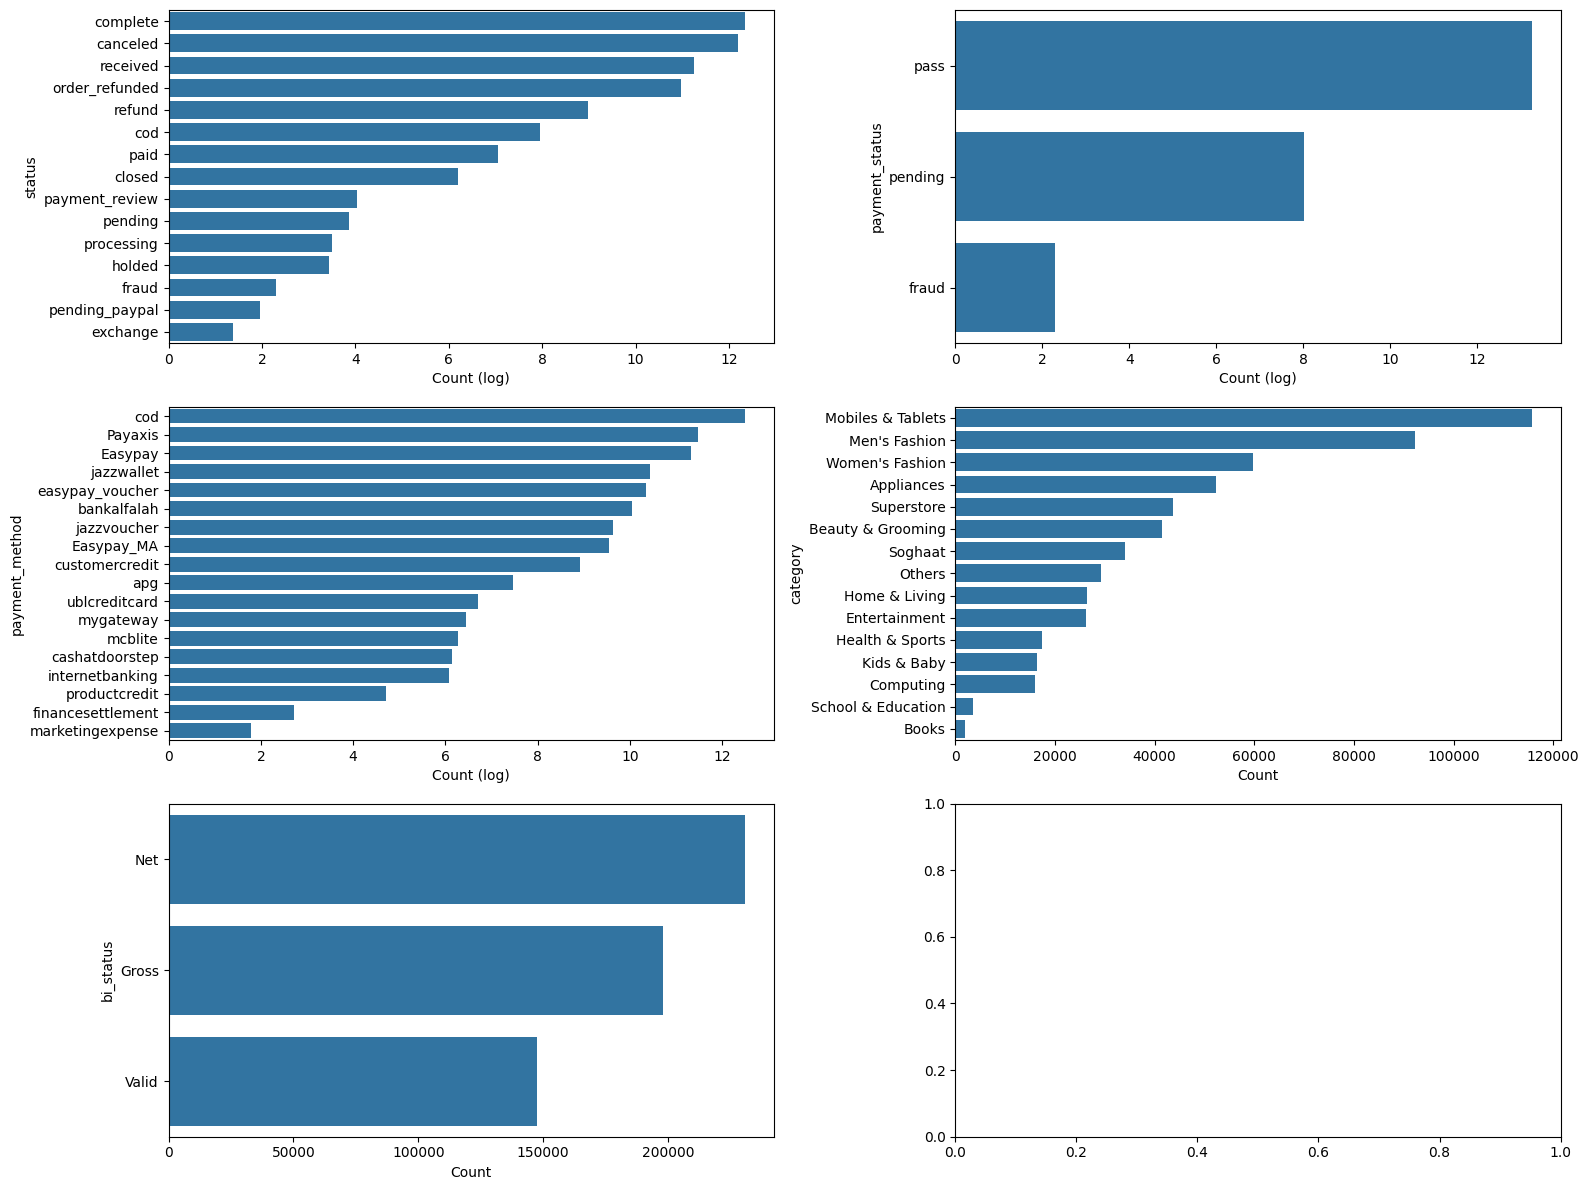

In [188]:
f, ax = plt.subplots(3,2, figsize=(16,12))
tmp1 = tmp.status.value_counts()
ax[0,0] = sns.barplot(x=np.log(tmp1.values), y=tmp1.index, orient='h', ax=ax[0,0])
ax[0,0].set_xlabel('Count (log)')
tmp1 = tmp.payment_status.value_counts()
ax[0,1] = sns.barplot(x=np.log(tmp1.values), y=tmp1.index, orient='h', ax=ax[0,1])
ax[0,1].set_xlabel('Count (log)')
tmp1 = tmp.payment_method.value_counts()
ax[1,0] = sns.barplot(x=np.log(tmp1.values), y=tmp1.index, orient='h', ax=ax[1,0])
ax[1,0].set_xlabel('Count (log)')
tmp1 = tmp.category.value_counts()
ax[1,1] = sns.barplot(x=tmp1.values, y=tmp1.index, orient='h', ax=ax[1,1])
ax[1,1].set_xlabel('Count')
tmp1 = tmp.bi_status.value_counts()
ax[2,0] = sns.barplot(x=tmp1.values, y=tmp1.index, orient='h', ax=ax[2,0])
ax[2,0].set_xlabel('Count')
plt.tight_layout()
plt.show()


#### Timeseries Visualization (unfinish)

In [263]:
tmp = df.groupBy('created_at','status').count().sort('created_at', ascending=True).toPandas()
tmp = tmp.set_index('created_at')

tmp1 = df.groupBy('created_at','payment_status').count().sort('created_at', ascending=True).toPandas()
tmp1 = tmp1.set_index('created_at')

In [253]:
tmp.status.unique()

array(['refund', 'complete', 'canceled', 'order_refunded', 'received',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       'cod', 'pending', 'processing', 'payment_review'], dtype=object)

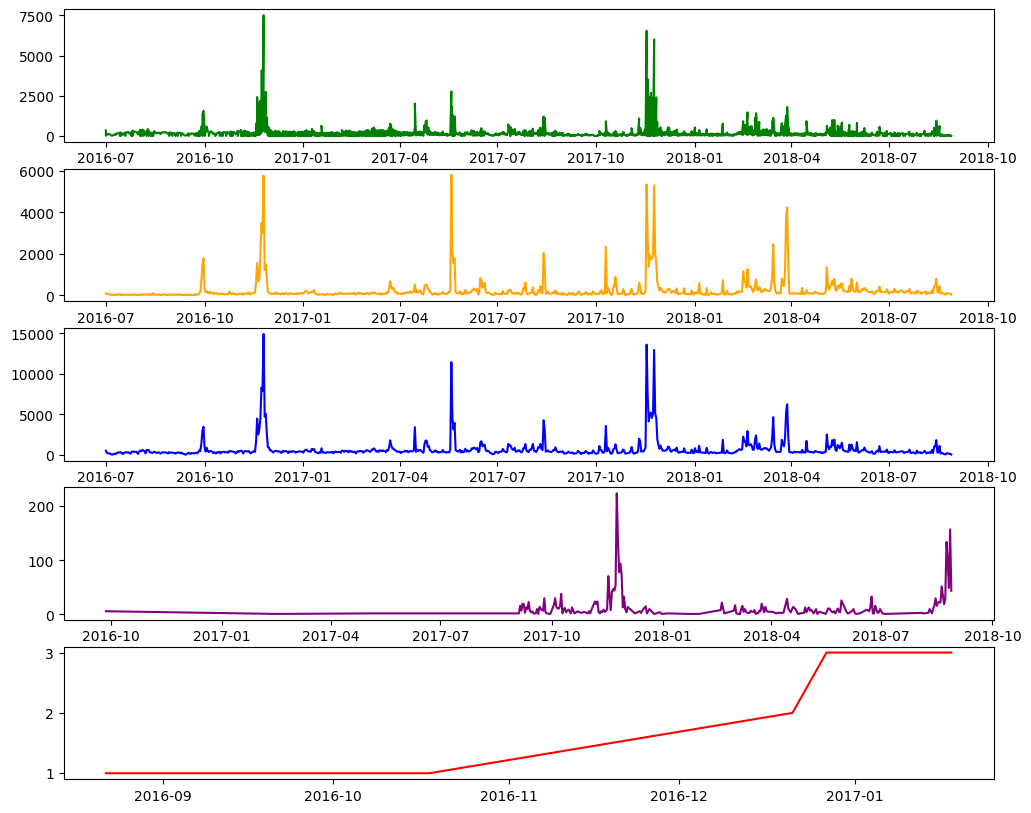

In [269]:
f,ax = plt.subplots(5,1,figsize=(12,10))
tmp2 = tmp[tmp.status.isin(['complete','paid','received'])]
ax[0].plot(tmp2.index, tmp2['count'], color='green')
tmp2 = tmp[tmp.status.isin(['canceled'])]
ax[1].plot(tmp2.index, tmp2['count'], color='orange')
tmp2 = tmp1[tmp1.payment_status.isin(['pass'])]
ax[2].plot(tmp2.index, tmp2['count'], color='blue')
tmp2 = tmp1[tmp1.payment_status.isin(['pending'])]
ax[3].plot(tmp2.index, tmp2['count'], color='purple')
tmp2 = tmp1[tmp1.payment_status.isin(['fraud'])]
ax[4].plot(tmp2.index, tmp2['count'], color='red')
plt.show()

#### Correlation Between Columns (unfinish)

In [255]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

In [256]:
# data = df.select('qty_ordered','price','discount_amount','grand_total')
# vector_col = "corr_features"
# assembler = VectorAssembler(inputCols=data.columns, 
#                             outputCol=vector_col)
# myGraph_vector = assembler.transform(data).select(vector_col)


In [257]:
# matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
# corrmatrix = matrix.toArray().tolist()
# correlation_dataframe = spark.createDataFrame(corrmatrix, data.columns)

In [258]:
# correlation_dataframe.head()

In [260]:
# plt.figure(figsize = (12,10))
# ax = sns.heatmap(correlation_dataframe.toPandas(), annot=True)
# ax.set_yticklabels(correlation_dataframe.columns)
# plt.show()

## Problem 1: Forecasting Sales Data

### Define Feature Data

In [278]:
train = df.filter(df.status=='complete').groupBy('created_at').sum('grand_total').sort('created_at').toPandas()

In [282]:
train.rename(columns={'created_at':'ds','sum(grand_total)':'y'}, inplace=True)


,ds,y
0,2016-07-01,347909.00
1,2016-07-02,250034.00
2,2016-07-03,105643.00
3,2016-07-04,576674.25
4,2016-07-05,216809.50
...,...,...
721,2018-07-31,6470.00
722,2018-08-04,0.00
723,2018-08-07,7184.00
724,2018-08-09,12520.00


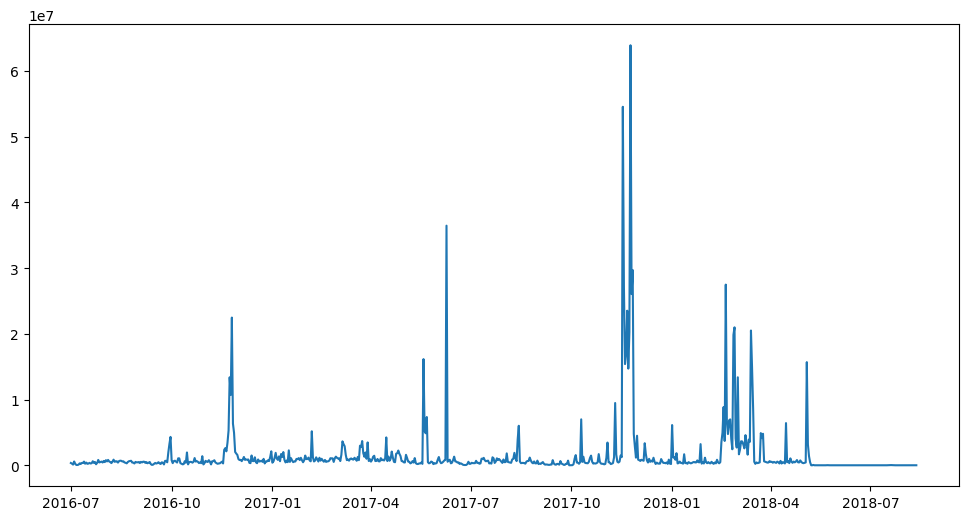

In [285]:
plt.figure(figsize=(12,6))
plt.plot(train['ds'],train['y'])
plt.show()

### Forecast Model Training

In [286]:
from prophet import Prophet

In [288]:
model = Prophet()
model.fit(train)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\dendy\AppData\Local\Temp\tmpamgks35u\u5yuky9c.json
DEBUG:cmdstanpy:input tempfile: C:\Users\dendy\AppData\Local\Temp\tmpamgks35u\zmwj22wo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\dendy\\miniconda3\\envs\\airflow\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=38766', 'data', 'file=C:\\Users\\dendy\\AppData\\Local\\Temp\\tmpamgks35u\\u5yuky9c.json', 'init=C:\\Users\\dendy\\AppData\\Local\\Temp\\tmpamgks35u\\zmwj22wo.json', 'output', 'file=C:\\Users\\dendy\\AppData\\Local\\Temp\\tmpamgks35u\\prophet_modelh_yu86ry\\prophet_model-20231102145103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:03 - cmdstanpy - INFO - Chain [1] start pr

In [289]:
train.tail()

,ds,y
721,2018-07-31,6470.0
722,2018-08-04,0.0
723,2018-08-07,7184.0
724,2018-08-09,12520.0
725,2018-08-12,3297.0


In [291]:
# forecasting up to 3 months
future = model.make_future_dataframe(periods=365)
future.tail(4)

,ds
1087,2019-08-09
1088,2019-08-10
1089,2019-08-11
1090,2019-08-12


In [292]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1086,2019-08-08,-1.315328e+06,-6.516709e+06,3.960573e+06
1087,2019-08-09,4.461270e+05,-4.286927e+06,5.695772e+06
1088,2019-08-10,-1.294008e+06,-6.636164e+06,4.271924e+06
1089,2019-08-11,-1.694946e+06,-7.170146e+06,3.185003e+06
1090,2019-08-12,-1.358651e+06,-6.284599e+06,4.092461e+06


c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\dendy\miniconda3\envs\airflow\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


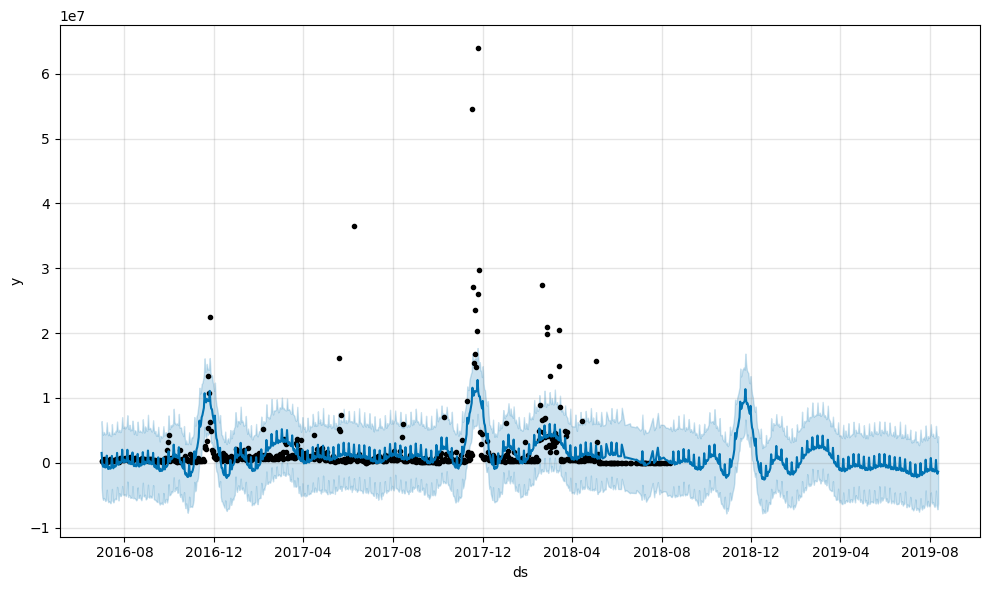

In [293]:
_ = model.plot(forecast)

### Model Evaluate

In [304]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [312]:
cv = cross_validation(model, initial='365 days', period='90 days', horizon = '60 days')
df_p = performance_metrics(cv, metrics=['mse', 'rmse', 'mae', 'mape', 'mdape', 'smape', 'coverage'])

INFO:prophet:Making 4 forecasts with cutoffs between 2017-09-16 00:00:00 and 2018-06-13 00:00:00
  0%|          | 0/4 [00:00<?, ?it/s]DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\dendy\AppData\Local\Temp\tmpamgks35u\fw30d6zt.json
DEBUG:cmdstanpy:input tempfile: C:\Users\dendy\AppData\Local\Temp\tmpamgks35u\42qd1yw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\dendy\\miniconda3\\envs\\airflow\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=42677', 'data', 'file=C:\\Users\\dendy\\AppData\\Local\\Temp\\tmpamgks35u\\fw30d6zt.json', 'init=C:\\Users\\dendy\\AppData\\Local\\Temp\\tmpamgks35u\\42qd1yw4.json', 'output', 'file=C:\\Users\\dendy\\AppData\\Local\\Temp\\tmpamgks35u\\prophet_modele05xb4pv\\prophet_model-20231102150552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:52 - cmd

In [313]:
df_p.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,6 days,5.242583e+12,2.289669e+06,1.496675e+06,2.541595,1.047955,1.0
1,7 days,6.264537e+12,2.502906e+06,1.752519e+06,3.510120,1.171359,1.0
2,8 days,5.422240e+12,2.328570e+06,1.659820e+06,3.145521,1.156297,1.0
3,9 days,4.655870e+12,2.157747e+06,1.565232e+06,3.510120,1.198455,1.0
4,10 days,3.892887e+12,1.973040e+06,1.487510e+06,3.145521,1.155495,1.0


In [314]:
df_p.tail()

,horizon,mse,rmse,mae,mdape,smape,coverage
50,56 days,1.376933e+13,3.710705e+06,2.965377e+06,11.276556,1.347448,0.85
51,57 days,1.565298e+13,3.956385e+06,3.266356e+06,15.732229,1.476698,0.80
52,58 days,1.610425e+13,4.013010e+06,3.373058e+06,11.582389,1.486839,0.80
53,59 days,1.674087e+13,4.091560e+06,3.509882e+06,15.732229,1.529333,0.80
54,60 days,1.624454e+13,4.030452e+06,3.435070e+06,16.256345,1.555787,0.80


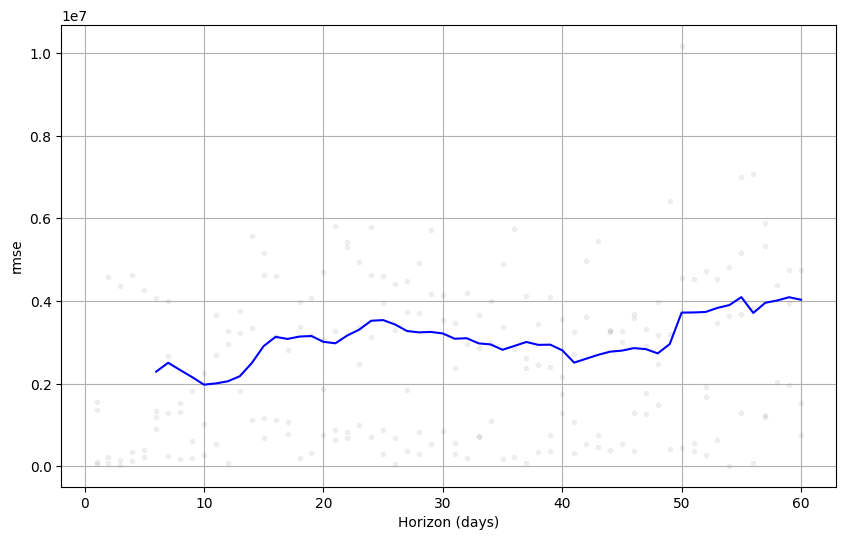

In [315]:
fig = plot_cross_validation_metric(cv, metric='rmse')